## SELECTION DES ATTRIBUTS

#### EXO1

#### EXO2

In [2142]:
import pandas as pd

In [2143]:
import numpy as np

url = "./airquality.csv"
data = pd.read_csv(url, sep=',')

data = data[~np.isnan(data).any(axis=1)]

print(data.columns)

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


In [2144]:
data.shape

(111, 7)

In [2145]:
data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [2146]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7


In [2147]:
data = data.drop(data.columns[0], axis=1) 

In [2148]:
from sklearn.preprocessing import MinMaxScaler


numeric_columns = data.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

Correlation matrix

In [2149]:
df = pd.DataFrame(data)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.612497  0.698541  0.142885 -0.005190
Solar.R  0.348342  1.000000 -0.127183  0.294088 -0.074067 -0.057754
Wind    -0.612497 -0.127183  1.000000 -0.497190 -0.194496  0.049871
Temp     0.698541  0.294088 -0.497190  1.000000  0.403972 -0.096546
Month    0.142885 -0.074067 -0.194496  0.403972  1.000000 -0.009001
Day     -0.005190 -0.057754  0.049871 -0.096546 -0.009001  1.000000


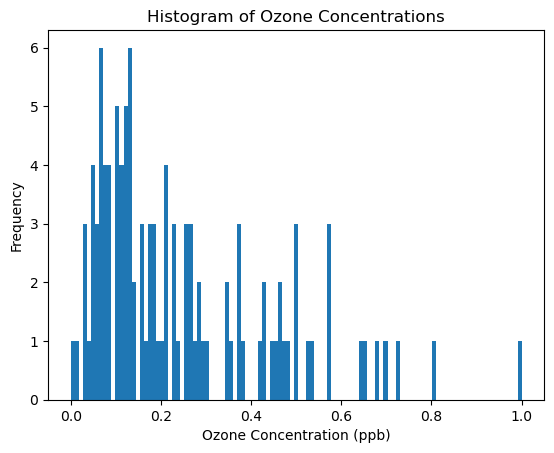

In [2150]:
import matplotlib.pyplot as plt


plt.hist(data["Ozone"], bins=data.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()

In [2151]:
data.shape

(111, 6)

In [2152]:
x = df.drop('Ozone', axis=1)
y = data['Ozone']
print(x.shape)
print(y.shape)

(111, 5)
(111,)


### preparation des training_data et test_data 

In [2153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Dimensions de l'ensemble d'entraînement :", x_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test :", x_test.shape, y_test.shape)

Dimensions de l'ensemble d'entraînement : (88, 5) (88,)
Dimensions de l'ensemble de test : (23, 5) (23,)


In [2154]:
ones_column = np.ones((x_train.shape[0], 1))
x_train = np.hstack((ones_column, x_train))
x_train.shape

(88, 6)

In [2155]:
print(x_train)

[[1.         0.96636086 0.5        0.75       0.25       0.3       ]
 [1.         0.66055046 0.18478261 0.55       0.         0.96666667]
 [1.         0.34556575 0.5        0.4        0.25       0.6       ]
 [1.         0.85015291 0.2173913  0.675      0.5        0.56666667]
 [1.         0.70642202 0.05978261 0.6        0.75       0.8       ]
 [1.         0.11314985 0.40217391 0.125      0.         0.63333333]
 [1.         0.12538226 0.65217391 0.575      0.5        0.46666667]
 [1.         0.65137615 0.43478261 0.525      1.         0.23333333]
 [1.         0.68195719 0.4673913  0.45       1.         0.26666667]
 [1.         0.81651376 0.4673913  0.275      0.         0.43333333]
 [1.         0.80122324 0.09782609 0.675      0.5        0.        ]
 [1.         0.62996942 0.27717391 0.775      0.5        0.9       ]
 [1.         0.13455657 0.2173913  0.55       0.75       0.53333333]
 [1.         0.56269113 0.68478261 0.5        0.25       0.5       ]
 [1.         0.81039755 0.18478261

In [2156]:
x_train.shape[1] # shape[1] nombre de columns (features)

6

In [2157]:
import numpy as np

y_array = y_train.to_numpy()
y_train= y_array.reshape(y_train.shape[0], 1)
print(y_train.shape)

(88, 1)


# Linear regression

In [2158]:
np.random.seed(0)  
theta = np.random.randn(x_train.shape[1], 1)
theta

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788]])

In [2159]:
theta.shape

(6, 1)

In [2160]:
n_iterations = 100
learning_rate = 0.01
lambda_ = 80


In [2161]:
def Linear_model(x_train, theta):
    return x_train.dot(theta)

In [2162]:
Linear_model(x_train, theta).shape

(88, 1)

In [2163]:
x_train.shape

(88, 6)

In [2164]:
y_train.shape

(88, 1)

In [2165]:
def cost_function(x_train, y_train, theta, lambda_):
    m = len(y_train)
    ridge_term = (lambda_ / 2*m) * np.sum(theta[1:]**2)
    return (1/(2*m) * np.sum((Linear_model(x_train, theta) - y_train)**2)) + ridge_term

In [2166]:
x_train.shape

(88, 6)

In [2167]:
y_train.shape

(88, 1)

In [2168]:
theta.shape

(6, 1)

In [2169]:
cost_function(x_train, y_train, theta , lambda_)

37258.472222734614

In [2170]:
def grad(x_train, y_train_train, theta , lambda_):
    m = len(y_train)
    grad = (1 / m) * x_train.T.dot(Linear_model(x_train, theta) - y_train)
    ridge_term = (lambda_ / m) * theta
    ridge_term[0] = 0
    return grad + ridge_term

In [2171]:
grad(x_train, y_train, theta, lambda_)

array([[3.89928154],
       [2.52014326],
       [2.56178243],
       [4.18154922],
       [4.18757698],
       [0.88224614]])

In [2172]:
x_train.T.shape

(6, 88)

In [2173]:
(Linear_model(x_train, theta) - y_train).shape

(88, 1)

In [2174]:
x_train.T.dot(Linear_model(x_train, theta) - y_train).shape

(6, 1)

In [2175]:
def gradient_descent(x_train, y_train, theta, lambda_, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)
    
    for i in range(n_iterations):

        theta = theta - learning_rate * grad(x_train, y_train, theta, lambda_)
        
        cost_history[i] = cost_function(x_train, y_train, theta , lambda_)
        
    return theta, cost_history

In [2176]:
theta_final, cost_history = gradient_descent(x_train, y_train, theta, lambda_, learning_rate, n_iterations)

In [2177]:
theta_final

array([[ 0.4693713 ],
       [-0.20974634],
       [ 0.08867752],
       [ 0.51054106],
       [ 0.27923451],
       [-0.67302478]])

In [2178]:
cost_history

array([35878.11327231, 34563.17366209, 33310.12193476, 32115.62730177,
       30976.54804202, 29889.92057483, 28852.94916778, 27862.99624268,
       26917.57324468, 26014.33204188, 25151.05682448, 24325.65647454,
       23536.15737874, 22780.69665859, 22057.51579368, 21364.95461514,
       20701.4456477 , 20065.50878024, 19455.74624547, 18870.83789099,
       18309.53672465, 17770.66471829, 17253.10885477, 16755.81740429,
       16277.79641646, 15818.10641574, 15375.85928837, 14950.21534953,
       14540.38058053, 14145.60402578, 13765.17534062, 13398.42248091,
       13044.7095264 , 12703.43462986, 12374.02808496, 12055.95050562,
       11748.69111076, 11451.76610792, 11164.71717038, 10887.11000206,
       10618.5329852 , 10358.59590614, 10106.92875439,  9863.18059098,
        9627.01848199,  9398.12649333,  9176.20474353,  8960.96851079,
        8752.14739151,  8549.48450696,  8352.73575567,  8161.66910847,
        7976.06394415,  7795.71042296,  7620.40889611,  7449.96934895,
      

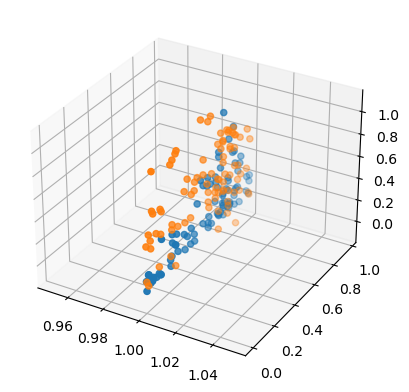

In [2179]:
predictions = Linear_model(x_train, theta_final)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train[:,0], x_train[:,1], y_train)
ax.scatter(x_train[:,0], x_train[:,1], predictions)

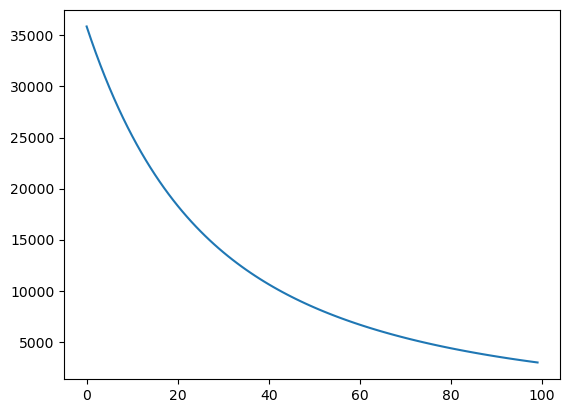

In [2180]:
plt.plot(range(n_iterations), cost_history)

In [2181]:
def coef_determination(y_train, pred):

    u = ((y_train - pred)**2).sum()
    v = ((y_train - y_train.mean())**2).sum()
    return 1 - u/v

In [2182]:
coef_determination(y_train, predictions)

-2.8411579941018643